In [188]:
import re
import os
os.environ['REQUESTS_CA_BUNDLE'] = 'ca-bundle.crt'
import requests
import json

import bs4
from dateutil.parser import parse as date_parse


def get_beaker_jobs(pages=5):
    beaker_jobs = set()
    for page in range(1, pages + 1):
        url = 'https://beaker.engineering.redhat.com/jobs/?jobsearch-0.value=cki&jobsearch-0.table=Group&list_tgp_ordering=-id&list_tgp_no={}&list_tgp_limit=500&jobsearch-0.operation=is&jobsearch--repetitions=1'.format(page)
        response = requests.get(url)
        soup = bs4.BeautifulSoup(response.content, 'html.parser')
        for href in soup.findAll('a'):
            if href.string and href.string.startswith('J:'):
                beaker_jobs.add(int(href.string[2:]))
        print('Fetching page %i' % page)
    return beaker_jobs


def fetch_beaker_job_json(job_id):
    cache_file = os.path.join('cache', '{}.json'.format(job_id))
    if os.path.exists(cache_file):
        with open(cache_file) as file:
            try:
                result = json.load(file)
            except json.JSONDecodeError:
                os.remove(cache_file)
                return parse_job(job_id)
    else:
        job_url = 'https://beaker.engineering.redhat.com/jobs/{}'
        try:
            response = requests.get(job_url.format(job_id), headers={'Accept': 'application/json'})
        except requests.ConnectionError:
            print('ConnectionError, skipping this job')
            return (None, None, None)
        result = response.json()
        with open(cache_file, 'w') as file:
            json.dump(result, file)
    return result

def parse_job(job_id):
    beaker_json = fetch_beaker_job_json(job_id)
    data = {}
    submitted_time = date_parse(beaker_json['submitted_time'])
    data['submitted_time'] = submitted_time
    try:
        first_action_time = date_parse(beaker_json['recipesets'][0]['machine_recipes'][0]['installation']['commands'][0]['start_time'])
    except (IndexError, TypeError):
        return {}
    data['queue_time'] = (first_action_time - submitted_time).total_seconds()
    data['arch'] = beaker_json['recipesets'][0]['machine_recipes'][0]['installation']['arch']
    data['status'] = beaker_json['status']
    return data

        
def main():
    try:
        os.makedirs('cache')
    except:
        pass
    result = []
    print('Fetching job ids')
    jobs = get_beaker_jobs(60)
    for idx, job_id in enumerate(jobs):
        print('Processing job %s - %i/%i' % (job_id + 1, idx, len(jobs)))
        job_parsed = parse_job(job_id)
        result.append(job_parsed)
    return result
    
result = main()

Fetching job ids
Fetching page 1
Fetching page 2
Fetching page 3
Fetching page 4
Fetching page 5
Fetching page 6
Fetching page 7
Fetching page 8
Fetching page 9
Fetching page 10
Fetching page 11
Fetching page 12
Fetching page 13
Fetching page 14
Fetching page 15
Fetching page 16
Fetching page 17
Fetching page 18
Fetching page 19
Fetching page 20
Fetching page 21
Fetching page 22
Fetching page 23
Fetching page 24
Fetching page 25
Fetching page 26
Fetching page 27
Fetching page 28
Fetching page 29
Fetching page 30
Fetching page 31
Fetching page 32
Fetching page 33
Fetching page 34
Fetching page 35
Fetching page 36
Fetching page 37
Fetching page 38
Fetching page 39
Fetching page 40
Fetching page 41
Fetching page 42
Fetching page 43
Fetching page 44
Fetching page 45
Fetching page 46
Fetching page 47
Fetching page 48
Fetching page 49
Fetching page 50
Fetching page 51
Fetching page 52
Fetching page 53
Fetching page 54
Fetching page 55
Fetching page 56
Fetching page 57
Fetching page 58
Fetchi

Processing job 3244728 - 267/3000
Processing job 3244729 - 268/3000
Processing job 3244730 - 269/3000
Processing job 3244731 - 270/3000
Processing job 3228348 - 271/3000
Processing job 3228349 - 272/3000
Processing job 3228350 - 273/3000
Processing job 3228351 - 274/3000
Processing job 3228353 - 275/3000
Processing job 3228355 - 276/3000
Processing job 3228356 - 277/3000
Processing job 3211973 - 278/3000
Processing job 3211972 - 279/3000
Processing job 3228359 - 280/3000
Processing job 3228360 - 281/3000
Processing job 3228361 - 282/3000
Processing job 3228362 - 283/3000
Processing job 3228363 - 284/3000
Processing job 3228364 - 285/3000
Processing job 3228365 - 286/3000
Processing job 3228366 - 287/3000
Processing job 3228367 - 288/3000
Processing job 3244754 - 289/3000
Processing job 3203795 - 290/3000
Processing job 3138260 - 291/3000
Processing job 3138261 - 292/3000
Processing job 3203798 - 293/3000
Processing job 3203799 - 294/3000
Processing job 3203800 - 295/3000
Processing job

Processing job 3136216 - 587/3000
Processing job 3136218 - 588/3000
Processing job 3204379 - 589/3000
Processing job 3204380 - 590/3000
Processing job 3204384 - 591/3000
Processing job 3204386 - 592/3000
Processing job 3228963 - 593/3000
Processing job 3228964 - 594/3000
Processing job 3228965 - 595/3000
Processing job 3204390 - 596/3000
Processing job 3204391 - 597/3000
Processing job 3204389 - 598/3000
Processing job 3204388 - 599/3000
Processing job 3204394 - 600/3000
Processing job 3204395 - 601/3000
Processing job 3204396 - 602/3000
Processing job 3220798 - 603/3000
Processing job 3220799 - 604/3000
Processing job 3220800 - 605/3000
Processing job 3220801 - 606/3000
Processing job 3228994 - 607/3000
Processing job 3136228 - 608/3000
Processing job 3229010 - 609/3000
Processing job 3220819 - 610/3000
Processing job 3220820 - 611/3000
Processing job 3220821 - 612/3000
Processing job 3220818 - 613/3000
Processing job 3204463 - 614/3000
Processing job 3220848 - 615/3000
Processing job

Processing job 3139564 - 844/3000
Processing job 3205101 - 845/3000
Processing job 3205103 - 846/3000
Processing job 3139568 - 847/3000
Processing job 3205114 - 848/3000
Processing job 3205115 - 849/3000
Processing job 3205116 - 850/3000
Processing job 3205120 - 851/3000
Processing job 3237889 - 852/3000
Processing job 3237890 - 853/3000
Processing job 3237891 - 854/3000
Processing job 3205123 - 855/3000
Processing job 3204753 - 856/3000
Processing job 3205133 - 857/3000
Processing job 3205135 - 858/3000
Processing job 3205137 - 859/3000
Processing job 3205138 - 860/3000
Processing job 3205145 - 861/3000
Processing job 3205146 - 862/3000
Processing job 3205150 - 863/3000
Processing job 3205152 - 864/3000
Processing job 3205153 - 865/3000
Processing job 3205154 - 866/3000
Processing job 3205155 - 867/3000
Processing job 3205156 - 868/3000
Processing job 3205157 - 869/3000
Processing job 3229741 - 870/3000
Processing job 3229742 - 871/3000
Processing job 3229743 - 872/3000
Processing job

Processing job 3246814 - 1098/3000
Processing job 3246815 - 1099/3000
Processing job 3222238 - 1100/3000
Processing job 3246817 - 1101/3000
Processing job 3246818 - 1102/3000
Processing job 3246819 - 1103/3000
Processing job 3246820 - 1104/3000
Processing job 3222241 - 1105/3000
Processing job 3246822 - 1106/3000
Processing job 3246823 - 1107/3000
Processing job 3222239 - 1108/3000
Processing job 3222240 - 1109/3000
Processing job 3205861 - 1110/3000
Processing job 3205859 - 1111/3000
Processing job 3140331 - 1112/3000
Processing job 3140330 - 1113/3000
Processing job 3140328 - 1114/3000
Processing job 3246831 - 1115/3000
Processing job 3246832 - 1116/3000
Processing job 3246833 - 1117/3000
Processing job 3205874 - 1118/3000
Processing job 3205875 - 1119/3000
Processing job 3205876 - 1120/3000
Processing job 3205873 - 1121/3000
Processing job 3140347 - 1122/3000
Processing job 3140349 - 1123/3000
Processing job 3214078 - 1124/3000
Processing job 3214079 - 1125/3000
Processing job 32140

Processing job 3247620 - 1418/3000
Processing job 3247621 - 1419/3000
Processing job 3239430 - 1420/3000
Processing job 3239431 - 1421/3000
Processing job 3239432 - 1422/3000
Processing job 3223048 - 1423/3000
Processing job 3223047 - 1424/3000
Processing job 3223046 - 1425/3000
Processing job 3223045 - 1426/3000
Processing job 3206674 - 1427/3000
Processing job 3206675 - 1428/3000
Processing job 3206676 - 1429/3000
Processing job 3206677 - 1430/3000
Processing job 3206678 - 1431/3000
Processing job 3206679 - 1432/3000
Processing job 3206681 - 1433/3000
Processing job 3206682 - 1434/3000
Processing job 3206683 - 1435/3000
Processing job 3206686 - 1436/3000
Processing job 3206687 - 1437/3000
Processing job 3206688 - 1438/3000
Processing job 3223078 - 1439/3000
Processing job 3239499 - 1440/3000
Processing job 3239500 - 1441/3000
Processing job 3239503 - 1442/3000
Processing job 3247709 - 1443/3000
Processing job 3247710 - 1444/3000
Processing job 3247711 - 1445/3000
Processing job 32395

Processing job 3207630 - 1741/3000
Processing job 3207631 - 1742/3000
Processing job 3207632 - 1743/3000
Processing job 3207633 - 1744/3000
Processing job 3206882 - 1745/3000
Processing job 3207651 - 1746/3000
Processing job 3224036 - 1747/3000
Processing job 3207653 - 1748/3000
Processing job 3207654 - 1749/3000
Processing job 3207652 - 1750/3000
Processing job 3199464 - 1751/3000
Processing job 3199465 - 1752/3000
Processing job 3199466 - 1753/3000
Processing job 3199467 - 1754/3000
Processing job 3133932 - 1755/3000
Processing job 3133931 - 1756/3000
Processing job 3197116 - 1757/3000
Processing job 3133935 - 1758/3000
Processing job 3133936 - 1759/3000
Processing job 3207665 - 1760/3000
Processing job 3207666 - 1761/3000
Processing job 3224051 - 1762/3000
Processing job 3224052 - 1763/3000
Processing job 3224053 - 1764/3000
Processing job 3207670 - 1765/3000
Processing job 3207671 - 1766/3000
Processing job 3197117 - 1767/3000
Processing job 3133937 - 1768/3000
Processing job 32076

Processing job 3249476 - 2005/3000
Processing job 3249477 - 2006/3000
Processing job 3249478 - 2007/3000
Processing job 3241287 - 2008/3000
Processing job 3241286 - 2009/3000
Processing job 3241285 - 2010/3000
Processing job 3208525 - 2011/3000
Processing job 3208526 - 2012/3000
Processing job 3208527 - 2013/3000
Processing job 3208528 - 2014/3000
Processing job 3208529 - 2015/3000
Processing job 3208530 - 2016/3000
Processing job 3208531 - 2017/3000
Processing job 3203802 - 2018/3000
Processing job 3208534 - 2019/3000
Processing job 3208535 - 2020/3000
Processing job 3208536 - 2021/3000
Processing job 3208537 - 2022/3000
Processing job 3192169 - 2023/3000
Processing job 3192170 - 2024/3000
Processing job 3192171 - 2025/3000
Processing job 3192172 - 2026/3000
Processing job 3203821 - 2027/3000
Processing job 3241398 - 2028/3000
Processing job 3241401 - 2029/3000
Processing job 3241402 - 2030/3000
Processing job 3203822 - 2031/3000
Processing job 3203823 - 2032/3000
Processing job 31403

Processing job 3209399 - 2276/3000
Processing job 3209400 - 2277/3000
Processing job 3209401 - 2278/3000
Processing job 3209402 - 2279/3000
Processing job 3209403 - 2280/3000
Processing job 3209404 - 2281/3000
Processing job 3209405 - 2282/3000
Processing job 3209411 - 2283/3000
Processing job 3209412 - 2284/3000
Processing job 3209413 - 2285/3000
Processing job 3209414 - 2286/3000
Processing job 3209417 - 2287/3000
Processing job 3135694 - 2288/3000
Processing job 3135695 - 2289/3000
Processing job 3135696 - 2290/3000
Processing job 3209426 - 2291/3000
Processing job 3209435 - 2292/3000
Processing job 3225824 - 2293/3000
Processing job 3225825 - 2294/3000
Processing job 3225826 - 2295/3000
Processing job 3225827 - 2296/3000
Processing job 3225828 - 2297/3000
Processing job 3225829 - 2298/3000
Processing job 3209442 - 2299/3000
Processing job 3193078 - 2300/3000
Processing job 3193086 - 2301/3000
Processing job 3193091 - 2302/3000
Processing job 3193094 - 2303/3000
Processing job 31931

Processing job 3193637 - 2532/3000
Processing job 3226409 - 2533/3000
Processing job 3226410 - 2534/3000
Processing job 3226411 - 2535/3000
Processing job 3136300 - 2536/3000
Processing job 3226413 - 2537/3000
Processing job 3226414 - 2538/3000
Processing job 3226415 - 2539/3000
Processing job 3136304 - 2540/3000
Processing job 3226417 - 2541/3000
Processing job 3226418 - 2542/3000
Processing job 3226419 - 2543/3000
Processing job 3226420 - 2544/3000
Processing job 3210037 - 2545/3000
Processing job 3242806 - 2546/3000
Processing job 3210039 - 2547/3000
Processing job 3242808 - 2548/3000
Processing job 3210041 - 2549/3000
Processing job 3210042 - 2550/3000
Processing job 3210043 - 2551/3000
Processing job 3210044 - 2552/3000
Processing job 3210045 - 2553/3000
Processing job 3210040 - 2554/3000
Processing job 3210038 - 2555/3000
Processing job 3193661 - 2556/3000
Processing job 3140601 - 2557/3000
Processing job 3136321 - 2558/3000
Processing job 3136323 - 2559/3000
Processing job 31363

Processing job 3227070 - 2812/3000
Processing job 3227071 - 2813/3000
Processing job 3227086 - 2814/3000
Processing job 3227088 - 2815/3000
Processing job 3227090 - 2816/3000
Processing job 3227091 - 2817/3000
Processing job 3227092 - 2818/3000
Processing job 3227093 - 2819/3000
Processing job 3210740 - 2820/3000
Processing job 3210741 - 2821/3000
Processing job 3210742 - 2822/3000
Processing job 3243553 - 2823/3000
Processing job 3243554 - 2824/3000
Processing job 3243555 - 2825/3000
Processing job 3243556 - 2826/3000
Processing job 3243557 - 2827/3000
Processing job 3243558 - 2828/3000
Processing job 3243560 - 2829/3000
Processing job 3243561 - 2830/3000
Processing job 3243562 - 2831/3000
Processing job 3243564 - 2832/3000
Processing job 3243565 - 2833/3000
Processing job 3243567 - 2834/3000
Processing job 3218992 - 2835/3000
Processing job 3218993 - 2836/3000
Processing job 3218991 - 2837/3000
Processing job 3218995 - 2838/3000
Processing job 3218996 - 2839/3000
Processing job 32189

# Queue time by architecture

In [232]:
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
from pandas.plotting import table
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 9]


df = pd.DataFrame(result)
dfi = df.set_index('submitted_time')

## Queue time by architecture daily

arch
aarch64    AxesSubplot(0.125,0.2;0.775x0.68)
ppc64      AxesSubplot(0.125,0.2;0.775x0.68)
ppc64le    AxesSubplot(0.125,0.2;0.775x0.68)
s390x      AxesSubplot(0.125,0.2;0.775x0.68)
x86_64     AxesSubplot(0.125,0.2;0.775x0.68)
Name: queue_time, dtype: object

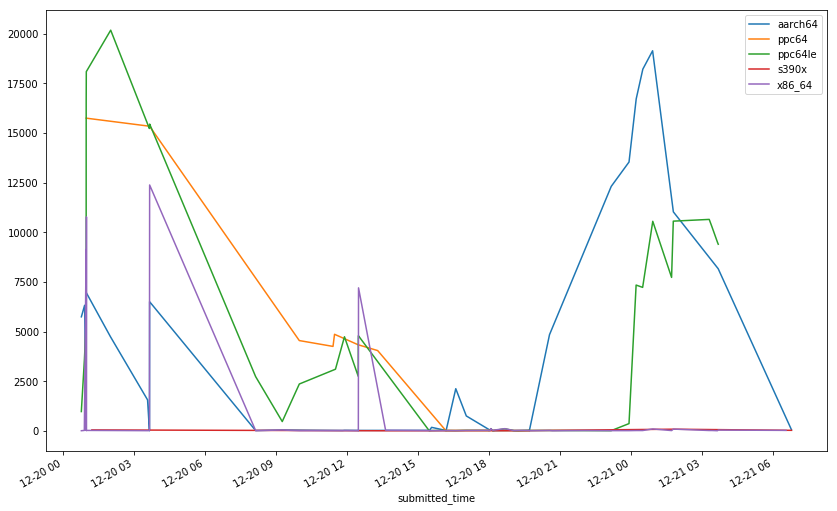

In [233]:
start = (datetime.datetime.today() - datetime.timedelta(days=1)).strftime("%Y-%m-%d")
end = datetime.datetime.today().strftime("%Y-%m-%d")
dfd = dfi.loc[start: end]
dfd.groupby('arch')['queue_time'].plot(legend=True)

### Statistics queue time by architecture daily

In [234]:
for arch in dfd.arch.dropna().unique():
    print("\n\nArchitecture %s" % arch)
    df_tmp = dfd[dfd.arch == arch]
    print(df_tmp.describe())



Architecture ppc64le
         queue_time
count     55.000000
mean    4538.000000
std     5839.628543
min        5.000000
25%       19.500000
50%      971.000000
75%     8353.500000
max    20171.000000


Architecture aarch64
         queue_time
count     41.000000
mean    3444.195122
std     5549.788001
min        8.000000
25%       21.000000
50%       96.000000
75%     5741.000000
max    19135.000000


Architecture x86_64
         queue_time
count     56.000000
mean     858.625000
std     2748.585412
min        4.000000
25%       12.750000
50%       18.000000
75%       33.500000
max    12378.000000


Architecture ppc64
         queue_time
count     12.000000
mean    4432.833333
std     5597.619930
min        7.000000
25%       21.000000
50%     4146.000000
75%     4624.000000
max    15742.000000


Architecture s390x
       queue_time
count    5.000000
mean    34.600000
std     31.516662
min      4.000000
25%     13.000000
50%     26.000000
75%     47.000000
max     83.000000


## Queue time by architecture weekly

arch
aarch64    AxesSubplot(0.125,0.2;0.775x0.68)
ppc64      AxesSubplot(0.125,0.2;0.775x0.68)
ppc64le    AxesSubplot(0.125,0.2;0.775x0.68)
s390x      AxesSubplot(0.125,0.2;0.775x0.68)
x86_64     AxesSubplot(0.125,0.2;0.775x0.68)
Name: queue_time, dtype: object

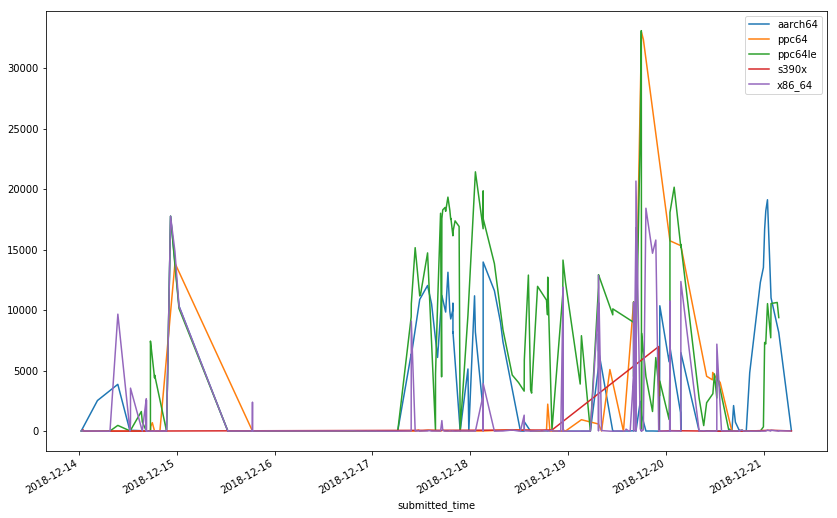

In [235]:
start = (datetime.datetime.today() - datetime.timedelta(days=7)).strftime("%Y-%m-%d")
end = datetime.datetime.today().strftime("%Y-%m-%d")
dfw = dfi.loc[start: end]
dfw.groupby('arch')['queue_time'].plot(legend=True)

### Statistics queue time by architecture weekly

In [236]:
for arch in dfw.arch.dropna().unique():
    print("\n\nArchitecture %s" % arch)
    df_tmp = dfw[dfw.arch == arch]
    print(df_tmp.describe())



Architecture x86_64
         queue_time
count    227.000000
mean    1349.251101
std     3846.583679
min        4.000000
25%       13.000000
50%       20.000000
75%       39.500000
max    20678.000000


Architecture aarch64
         queue_time
count    154.000000
mean    2837.857143
std     4672.450011
min        5.000000
25%       17.000000
50%       28.000000
75%     5266.250000
max    19135.000000


Architecture ppc64le
         queue_time
count    187.000000
mean    6911.026738
std     6907.865932
min        5.000000
25%       23.500000
50%     4737.000000
75%    12094.000000
max    33113.000000


Architecture s390x
        queue_time
count    12.000000
mean    619.250000
std    2009.756526
min       4.000000
25%      12.500000
50%      23.000000
75%      87.750000
max    7000.000000


Architecture ppc64
         queue_time
count     61.000000
mean    3198.688525
std     7685.002781
min        6.000000
25%       16.000000
50%       24.000000
75%      954.000000
max    32983.000000

## Queue time by architecture monthly

arch
aarch64    AxesSubplot(0.125,0.2;0.775x0.68)
ppc64      AxesSubplot(0.125,0.2;0.775x0.68)
ppc64le    AxesSubplot(0.125,0.2;0.775x0.68)
s390x      AxesSubplot(0.125,0.2;0.775x0.68)
x86_64     AxesSubplot(0.125,0.2;0.775x0.68)
Name: queue_time, dtype: object

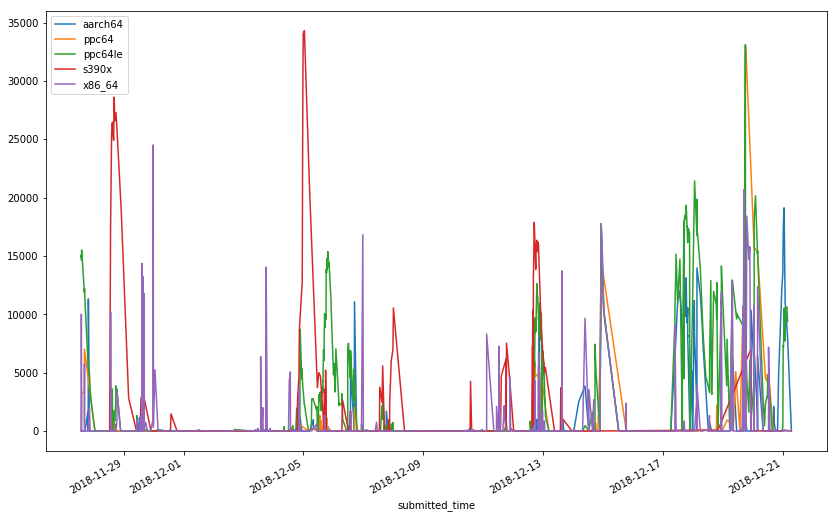

In [237]:
start = (datetime.datetime.today() - datetime.timedelta(days=30)).strftime("%Y-%m-%d")
end = datetime.datetime.today().strftime("%Y-%m-%d")
dfm = dfi.loc[start: end]
dfm.groupby('arch')['queue_time'].plot(legend=True)

### Statistics queue time by architecture monthly

In [238]:
for arch in dfm.arch.dropna().unique():
    print("\n\nArchitecture %s" % arch)
    df_tmp = dfm[dfm.arch == arch]
    print(df_tmp.describe())



Architecture x86_64
         queue_time
count    947.000000
mean     637.402323
std     2585.221575
min        4.000000
25%       15.000000
50%       22.000000
75%       32.000000
max    24523.000000


Architecture ppc64le
         queue_time
count    875.000000
mean    3055.448000
std     4947.616998
min        3.000000
25%       19.000000
50%       37.000000
75%     4520.000000
max    33113.000000


Architecture ppc64
         queue_time
count    332.000000
mean     816.831325
std     3555.971567
min        4.000000
25%       16.000000
50%       25.000000
75%       42.250000
max    32983.000000


Architecture aarch64
         queue_time
count    587.000000
mean     914.013629
std     2809.669861
min        4.000000
25%       16.000000
50%       22.000000
75%       43.500000
max    19135.000000


Architecture s390x
         queue_time
count    216.000000
mean    3856.148148
std     7452.604685
min        4.000000
25%       20.000000
50%       32.500000
75%     4367.250000
max    343

# Status (except Completed) by Architecture

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe68853ea20>],
      dtype=object)

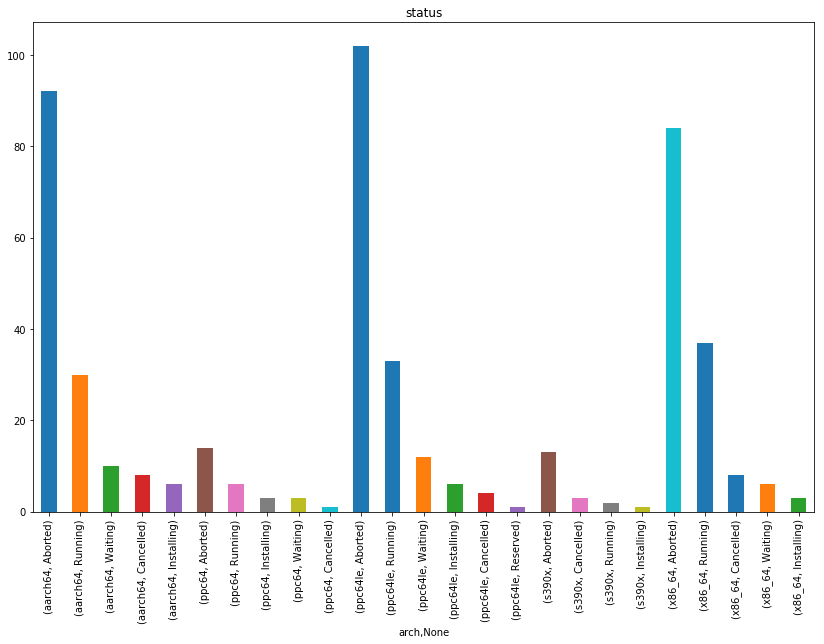

In [239]:
dfi[dfi.status != 'Completed'].groupby('arch')['status'].apply(pd.value_counts).plot(kind='bar', subplots=True)